## Lab: Datasets & NumPy - csv's, funciones, numpy y distribuciones

Ejecuta la celda de abajo para cargar los paquetes requeridos

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pandas as pd
%matplotlib inline

### Datos de ventas

Para este Lab vamos a usar una versión resumidade un dataset que contiente información sobre ventas de establecimientos económicos que analizaremos en detalle más adelante.

El csv tiene alrededor de 200 filas de datos y 4 columnas. El path especificado del csv ```sales_info.csv``` asume que se encuentra en el mismo directorio que la presente notebook. En caso que lo hayas descargado en otro directorio deberás hacer referencia de manera relativa o absoluta (googlear linux path examples relativa / absolute).

#### 1. Carga de datos

Utilizar el método ```read_csv``` de la librería Pandas para crear un dataframe a partir del archivo.

In [3]:
sales_info = pd.read_csv('sales_info.csv')

#### 2. Transformar la serie en un array de numpy

Utilizar el método ```np.array()``` transformar la serie "volume_sold" del dataframe generado en un array de numpy

In [4]:
volume_sold = sales_info['volume_sold']

##### 3. Imprimir los 10 primeros items de la columna 'volume_sold' utilizando "array slicing".

In [9]:
print(volume_sold[0:11])
print('\n')
print(volume_sold.head(10))

0     18.420760
1      4.776510
2     16.602401
3      4.296111
4      8.156023
5      5.005122
6     14.606750
7      4.456466
8      5.047530
9      5.388070
10     9.347349
Name: volume_sold, dtype: float64


0    18.420760
1     4.776510
2    16.602401
3     4.296111
4     8.156023
5     5.005122
6    14.606750
7     4.456466
8     5.047530
9     5.388070
Name: volume_sold, dtype: float64


#### 4.  Imprimir el tipo de dato del array

Utilizar la propiedad de los arrays dtype para conocer el tipo de dato del array

In [10]:
type(volume_sold)

pandas.core.series.Series

#### 5. Escribir una función para imprimir la información resumida

La función debería:

- Tomar dos parámetros: el nombre de la columna y los datos asociados con esa columna
- Imprimir la información, indicando de forma clara en qué consiste cada item que se imprime:
    1. Imprimir el nombre de la columna
    2. Imprimir la media de los datos usando ```np.mean()```
    3. Imprimir la mediana de los datos usando ```np.median()``` 
    4. Imprimir la moda de los datos redondeados usando ```stats.mode()```
    5. Imprimir la varianza de los datos usando ```np.var()```
    6. Imprimir el desvío estándar de los datos usando ```np.std()```

Tener en cuenta que para poder imprimir, será necesario covertir los valores numéricos retornados por estas funciones a strings. Para ello usar la función ```str()```.

In [30]:
def descstats(column, data):
    filtered = data[column]
    print("Columna: {0} \nMedia : {1} \nMediana: {2} \nModa: {3} \nVarianza: {4}\nDesvío Std: {5}"\
          .format(column,\
                  np.mean(filtered),\
                  np.median(filtered),\
                  stats.mode(filtered),\
                  np.var(filtered),\
                  np.std(filtered)))

##### **5.A** Usando la función definida, imprimir las medidas para 'volume_sold'

In [31]:
descstats('volume_sold', sales_info)

Columna: volume_sold 
Media : 10.0186840789888 
Mediana: 8.16634551564 
Moda: ModeResult(mode=array([ 2.7946315]), count=array([1])) 
Varianza: 84.12996520049941
Desvío Std: 9.172238832504277


##### **5.B** Usando la función definida, imprimir las medidas para '2015_margin'

In [32]:
descstats('2015_margin', sales_info)

Columna: 2015_margin 
Media : 46.85889513792352 
Mediana: 36.5621438181 
Moda: ModeResult(mode=array([ 11.9961177]), count=array([1])) 
Varianza: 2016.0616629583994
Desvío Std: 44.90057530765502


##### **5.C** Usando la función definida, imprimir las medidas para '2015_q1_sales'

In [33]:
descstats('2015_q1_sales', sales_info)

Columna: 2015_q1_sales 
Media : 154631.66819999996 
Mediana: 104199.41 
Moda: ModeResult(mode=array([ 4151.93]), count=array([1])) 
Varianza: 47430301462.33151
Desvío Std: 217784.9890656643


##### **5.D** Usando la función definida, imprimir las medidas para '2016_q1_sales'

In [34]:
descstats('2016_q1_sales', sales_info)

Columna: 2016_q1_sales 
Media : 154699.17875 
Mediana: 103207.20000000001 
Moda: ModeResult(mode=array([ 3536.14]), count=array([1])) 
Varianza: 47139411653.445244
Desvío Std: 217116.12481215034


#### 6. Graficar las distribuciones

Hemos provisto una función para graficar más abajo llamado ```distribution_plotter()```. Toma dos parámetros, el nombre de la columna y los datos asociados a dicha columna.

En celdas individuales, graficar las distribuciones de cada una de las 4 columnas. ¿Los datos son asimétricos? ¿simétricos?

In [35]:
def distribution_plotter(column, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style("white")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribucion de ' + column + '\n', fontsize=16)

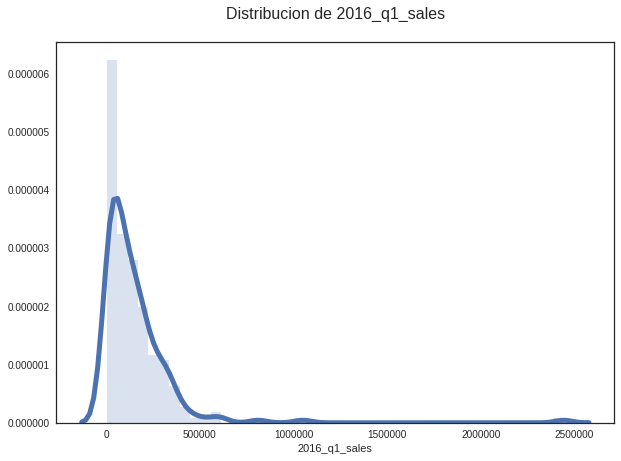

In [36]:
distribution_plotter('2016_q1_sales', sales_info['2016_q1_sales'])